In [143]:
import symbolic
import torch
state = torch.load('/Users/sofiadunlosky/Documents/models/CW/experiments/models/rn_lbc',map_location='cpu')

In [144]:
from symbolic import RN

In [136]:
import numpy as np
data=np.load('/Users/sofiadunlosky/Downloads/lbc_test_with_labels.npz')

In [137]:
# import get_function_name_as_string
# get_function_name_as_string(data['relations'][0])
a1=np.zeros((len(data['relations']),1)).tolist()
for i in range (0,len(data['relations'])):
    a1[i]=data['relations'][i].__name__
#         a1[i]=1
#     if data['relations'][i].__name__=='amax':
#         a1[i]=2
#     if data['relations'][i].__name__=='amin':
#         a1[i]=3
#     if data['relations'][i].__name__=='argmax':
#         a1[i]=4
#     if data['relations'][i].__name__=='argmin':
#         a1[i]=5
    


In [127]:
inputs=data['arr']

In [128]:
rn=RN()
rn.load_state_dict(torch.load('models/rn_'+'lbc', map_location='cpu'))
inputs = torch.tensor(inputs, dtype=torch.float, requires_grad=True)
a=rn(inputs)

In [121]:
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def plot_pca_data(a,a1,name):
    pca = PCA()
    pca.fit(a.detach().numpy())
    b=pca.transform(a.detach().numpy())
    k=np.unique(a1)
    a2=np.array(a1).reshape(-1,1)
    for i in range (0,k.size):
        scatter(b[:,0][np.where(a2==k[i])[0]],b[:,1][np.where(a2==k[i])[0]],label=k[i])
    plt.legend()
    plt.xlabel('component_0')
    plt.ylabel('component_1')
    plt.title(name+' pca')
    plt.show()

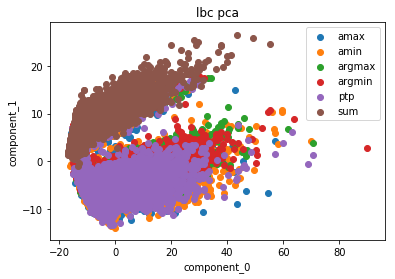

In [129]:
plot_pca_data(a[:,3,:],a1,'lbc')

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(a[:,3,:].detach().numpy())
b=pca.transform(a[:,3,:].detach().numpy())

In [138]:
np.save('data_lbc.npy',b)
np.save('label_lbc.npy',a1)

In [107]:
# import os
# models=os.listdir('/Users/sofiadunlosky/Documents/models/CW/experiments/models/')
# for i in range (0,len(models)):
# state = torch.load('/Users/sofiadunlosky/Documents/models/CW/experiments/models/'+models[i],map_location='cpu')

In [139]:
#state = torch.load('/Users/sofiadunlosky/Documents/models/CW/experiments/models/rn_mixed',map_location='cpu')
data=np.load('/Users/sofiadunlosky/Downloads/mixed_test_with_labels.npz')

In [140]:
inputs=data['arr']
rn=RN()
rn.load_state_dict(torch.load('models/rn_'+'mixed', map_location='cpu'))
inputs = torch.tensor(inputs, dtype=torch.float, requires_grad=True)
a=rn(inputs)


In [141]:
a1=np.zeros((len(data['relations']),1)).tolist()
for i in range (0,len(data['relations'])):
    a1[i]=data['relations'][i].__name__

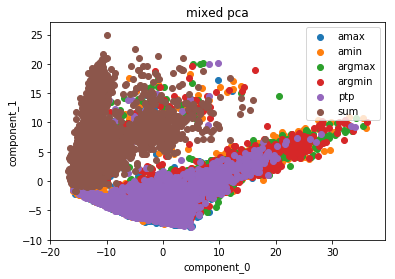

In [122]:
plot_pca_data(a[:,3,:],a1,'mixed')

In [142]:
# pca = PCA()
# pca.fit(a[:,3,:].detach().numpy())
# b=pca.transform(a[:,3,:].detach().numpy())
# np.save('data_mixed.npy',b)
# np.save('label_mixed.npy',a1)

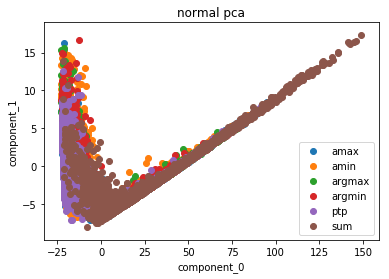

In [146]:
#normal model lbc data
import numpy as np
data=np.load('/Users/sofiadunlosky/Downloads/lbc_test_with_labels.npz')
inputs=data['arr']
rn=RN()
rn.load_state_dict(torch.load('models/rn_'+'random', map_location='cpu'))
inputs = torch.tensor(inputs, dtype=torch.float, requires_grad=True)
a=rn(inputs)
a1=np.zeros((len(data['relations']),1)).tolist()
for i in range (0,len(data['relations'])):
    a1[i]=data['relations'][i].__name__
plot_pca_data(a[:,3,:],a1,'normal')

In [147]:
# pca = PCA()
# pca.fit(a[:,3,:].detach().numpy())
# b=pca.transform(a[:,3,:].detach().numpy())
# np.save('data_normal.npy',b)
# np.save('label_normal.npy',a1)